In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [3]:
%matplotlib inline

In [4]:
covid_ng = pd.read_excel('data/records_covid19.xlsx', parse_dates=['Dates'],sheet_name='experimentation')
deathby_state = pd.read_csv('data/cases08052020.csv')

In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
covid_ng.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
covid_ng.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
74,2020-05-04 15:46:33,76,19,23,5,1,0,37,18,10,5,0,0,9,0,1,0,0,0,32,0,1,0,1,0,1,0,6,0,0,0,0,0,0,0,0,0,0,17,6
75,2020-05-05 15:45:23,43,10,32,6,0,2,9,6,3,5,0,0,3,3,0,0,0,0,0,0,0,0,14,1,0,0,2,1,0,1,0,0,7,0,0,0,0,64,5
76,2020-05-06 16:01:40,82,9,30,4,0,5,3,10,0,8,0,0,0,1,0,0,0,0,0,0,0,0,19,18,0,0,1,0,0,5,0,0,0,0,0,0,0,53,5
77,2020-05-07 15:20:48,183,0,55,5,0,6,11,9,0,3,8,1,19,7,0,0,0,3,44,1,2,0,19,4,0,0,0,1,0,0,0,0,0,0,0,0,0,67,4
78,2020-05-08 15:35:24,176,20,65,13,1,1,31,17,2,4,0,0,15,3,0,2,0,4,0,1,0,0,0,4,0,0,0,10,1,0,0,14,0,0,0,2,0,78,10


In [8]:
covid_ng.shape

(79, 40)

In [9]:
covid_ng.columns

Index(['Dates', 'Lagos', 'Abuja(FCT)', 'Kano', 'Ogun', 'Osun', 'Gombe',
       'Katsina', 'Borno', 'Edo', 'Oyo', 'Kwara', 'Akwa Ibom', 'Bauchi',
       'Kaduna', 'Ekiti', 'Ondo', 'Delta', 'Rivers', 'Jigawa', 'Enugu',
       'Niger', 'Abia', 'Zamfara', 'Sokoto', 'Benue', 'Anambra', 'Adamawa',
       'Plateau', 'Imo', 'Kebbi', 'Kogi', 'Nasarawa', 'Taraba', 'Yobe',
       'Bayelsa', 'Ebonyi', 'Cross River', 'Dischared/Revovered', 'Dealth'],
      dtype='object')

In [10]:
exp_wip = covid_ng.copy()

In [11]:
exp_wip.head()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#Extract geopolitical zone
exp_wip['South_West'] = exp_wip['Lagos'] + exp_wip['Ondo'] + exp_wip['Osun'] + exp_wip['Oyo'] + \
exp_wip['Ekiti'] + exp_wip['Ogun']

exp_wip['South_South'] = exp_wip['Edo'] + exp_wip['Rivers'] + exp_wip['Delta'] + exp_wip['Cross River'] + \
exp_wip['Bayelsa'] + exp_wip['Akwa Ibom']

exp_wip['South_East'] = exp_wip['Anambra'] + exp_wip['Imo'] + exp_wip['Enugu'] + exp_wip['Abia'] + \
exp_wip['Ebonyi']

exp_wip['North_Central'] = exp_wip['Benue'] + exp_wip['Kogi'] + exp_wip['Nasarawa'] + exp_wip['Niger'] + \
exp_wip['Plateau'] + exp_wip['Kwara']

exp_wip['North_East'] = exp_wip['Adamawa'] + exp_wip['Bauchi'] + exp_wip['Borno'] + exp_wip['Gombe'] + \
exp_wip['Taraba'] + exp_wip['Yobe']

exp_wip['North_West'] = exp_wip['Jigawa'] + exp_wip['Kaduna'] + exp_wip['Kano'] + exp_wip['Katsina'] + \
exp_wip['Kebbi'] + exp_wip['Sokoto'] + exp_wip['Zamfara']


In [13]:
exp_wip.tail()

,Dates,Lagos,Abuja(FCT),Kano,Ogun,Osun,Gombe,Katsina,Borno,Edo,Oyo,Kwara,Akwa Ibom,Bauchi,Kaduna,Ekiti,Ondo,Delta,Rivers,Jigawa,Enugu,Niger,Abia,Zamfara,Sokoto,Benue,Anambra,Adamawa,Plateau,Imo,Kebbi,Kogi,Nasarawa,Taraba,Yobe,Bayelsa,Ebonyi,Cross River,Dischared/Revovered,Dealth,South_West,South_South,South_East,North_Central,North_East,North_West
74,2020-05-04 15:46:33,76,19,23,5,1,0,37,18,10,5,0,0,9,0,1,0,0,0,32,0,1,0,1,0,1,0,6,0,0,0,0,0,0,0,0,0,0,17,6,88,10,0,2,33,93
75,2020-05-05 15:45:23,43,10,32,6,0,2,9,6,3,5,0,0,3,3,0,0,0,0,0,0,0,0,14,1,0,0,2,1,0,1,0,0,7,0,0,0,0,64,5,54,3,0,1,20,60
76,2020-05-06 16:01:40,82,9,30,4,0,5,3,10,0,8,0,0,0,1,0,0,0,0,0,0,0,0,19,18,0,0,1,0,0,5,0,0,0,0,0,0,0,53,5,94,0,0,0,16,76
77,2020-05-07 15:20:48,183,0,55,5,0,6,11,9,0,3,8,1,19,7,0,0,0,3,44,1,2,0,19,4,0,0,0,1,0,0,0,0,0,0,0,0,0,67,4,191,4,1,11,34,140
78,2020-05-08 15:35:24,176,20,65,13,1,1,31,17,2,4,0,0,15,3,0,2,0,4,0,1,0,0,0,4,0,0,0,10,1,0,0,14,0,0,0,2,0,78,10,196,6,4,24,33,103


In [14]:
#format header columns
def clean_col(name):
    return name.strip().lower().replace(" ", "_").replace('/','_')


In [15]:
exp_wip_col_clean = exp_wip.rename(columns=clean_col)

In [16]:
exp_wip_col_clean.head()

,dates,lagos,abuja(fct),kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,dischared_revovered,dealth,south_west,south_south,south_east,north_central,north_east,north_west
0,2020-02-27 15:40:38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
exp_wip_col_clean.rename(columns={'abuja(fct)': 'abuja','dealth':'death','dischared_revovered':'discharged_recovered'}, inplace=True)

In [18]:
exp_wip_col_clean.tail()

,dates,lagos,abuja,kano,ogun,osun,gombe,katsina,borno,edo,oyo,kwara,akwa_ibom,bauchi,kaduna,ekiti,ondo,delta,rivers,jigawa,enugu,niger,abia,zamfara,sokoto,benue,anambra,adamawa,plateau,imo,kebbi,kogi,nasarawa,taraba,yobe,bayelsa,ebonyi,cross_river,discharged_recovered,death,south_west,south_south,south_east,north_central,north_east,north_west
74,2020-05-04 15:46:33,76,19,23,5,1,0,37,18,10,5,0,0,9,0,1,0,0,0,32,0,1,0,1,0,1,0,6,0,0,0,0,0,0,0,0,0,0,17,6,88,10,0,2,33,93
75,2020-05-05 15:45:23,43,10,32,6,0,2,9,6,3,5,0,0,3,3,0,0,0,0,0,0,0,0,14,1,0,0,2,1,0,1,0,0,7,0,0,0,0,64,5,54,3,0,1,20,60
76,2020-05-06 16:01:40,82,9,30,4,0,5,3,10,0,8,0,0,0,1,0,0,0,0,0,0,0,0,19,18,0,0,1,0,0,5,0,0,0,0,0,0,0,53,5,94,0,0,0,16,76
77,2020-05-07 15:20:48,183,0,55,5,0,6,11,9,0,3,8,1,19,7,0,0,0,3,44,1,2,0,19,4,0,0,0,1,0,0,0,0,0,0,0,0,0,67,4,191,4,1,11,34,140
78,2020-05-08 15:35:24,176,20,65,13,1,1,31,17,2,4,0,0,15,3,0,2,0,4,0,1,0,0,0,4,0,0,0,10,1,0,0,14,0,0,0,2,0,78,10,196,6,4,24,33,103


In [19]:
#extract the total daily cases
exp_wip_col_clean['total_daily_cases'] = exp_wip_col_clean['lagos'] + exp_wip_col_clean['abuja'] + \
exp_wip_col_clean['kano'] + exp_wip_col_clean['ogun'] + exp_wip_col_clean['osun'] + \
exp_wip_col_clean['gombe'] + exp_wip_col_clean['katsina'] + exp_wip_col_clean['borno'] + \
exp_wip_col_clean['edo'] + exp_wip_col_clean['oyo'] + exp_wip_col_clean['kwara'] + \
exp_wip_col_clean['akwa_ibom'] + exp_wip_col_clean['kaduna'] + exp_wip_col_clean['ekiti'] + exp_wip_col_clean['ondo'] + \
exp_wip_col_clean['delta'] + exp_wip_col_clean['rivers'] + exp_wip_col_clean['jigawa'] + exp_wip_col_clean['enugu'] + \
exp_wip_col_clean['niger'] + exp_wip_col_clean['abia'] + exp_wip_col_clean['zamfara'] +  exp_wip_col_clean['sokoto'] + \
exp_wip_col_clean['benue'] + exp_wip_col_clean['anambra'] + exp_wip_col_clean['adamawa'] + exp_wip_col_clean['plateau'] + \
exp_wip_col_clean['imo'] + exp_wip_col_clean['kebbi'] + exp_wip_col_clean['kogi'] + exp_wip_col_clean['nasarawa'] + \
exp_wip_col_clean['taraba'] + exp_wip_col_clean['yobe'] + exp_wip_col_clean['bayelsa'] + exp_wip_col_clean['ebonyi'] + \
exp_wip_col_clean['cross_river'] + exp_wip_col_clean['bauchi']

In [20]:
exp_wip_col_clean['total_daily_cases'].tail()

74    245
75    148
76    195
77    381
78    386
Name: total_daily_cases, dtype: int64

In [21]:
exp_wip_col_clean['death'].tail()

74     6
75     5
76     5
77     4
78    10
Name: death, dtype: int64

In [22]:
exp_wip_col_clean.columns

Index(['dates', 'lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina',
       'borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna',
       'ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia',
       'zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo',
       'kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi',
       'cross_river', 'discharged_recovered', 'death', 'south_west',
       'south_south', 'south_east', 'north_central', 'north_east',
       'north_west', 'total_daily_cases'],
      dtype='object')

In [23]:
# implement tidy data principles; melt individual states into one column:'states' 
#and geopolitical zone into 'zones'
tidy_covid1 = exp_wip_col_clean.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','south_west','south_south', 'south_east', 'north_central','north_east','north_west'], 
                                   value_vars=['lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina','borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna','ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia','zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo','kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi','cross_river'],
                                   var_name='states', value_name='cases_state')

In [24]:
tidy_covid1.head()

,dates,discharged_recovered,death,total_daily_cases,south_west,south_south,south_east,north_central,north_east,north_west,states,cases_state
0,2020-02-27 15:40:38,0,0,1,1,0,0,0,0,0,lagos,1
1,2020-02-28 01:00:36,0,0,0,0,0,0,0,0,0,lagos,0
2,2020-02-29 02:26:52,0,0,0,0,0,0,0,0,0,lagos,0
3,2020-03-01 22:44:08,0,0,0,0,0,0,0,0,0,lagos,0
4,2020-03-02 11:53:02,0,0,0,0,0,0,0,0,0,lagos,0


In [25]:
#collapse zones into one column
tidy_covid_all = tidy_covid1.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','states','cases_state'], value_vars=['south_west','south_south', 'south_east', 'north_central','north_east','north_west'],
                                 var_name='geopolitical_zones', value_name='cases_zones')

In [26]:
tidy_covid_all.tail()

,dates,discharged_recovered,death,total_daily_cases,states,cases_state,geopolitical_zones,cases_zones
17533,2020-05-04 15:46:33,17,6,245,cross_river,0,north_west,93
17534,2020-05-05 15:45:23,64,5,148,cross_river,0,north_west,60
17535,2020-05-06 16:01:40,53,5,195,cross_river,0,north_west,76
17536,2020-05-07 15:20:48,67,4,381,cross_river,0,north_west,140
17537,2020-05-08 15:35:24,78,10,386,cross_river,0,north_west,103


###  Average Daily Cases By Geopolitical Zone

In [27]:
tidy_covid_all['geopolitical_zones'].unique()

array(['south_west', 'south_south', 'south_east', 'north_central',
       'north_east', 'north_west'], dtype=object)

In [28]:
average_zones_cases = tidy_covid_all.groupby('geopolitical_zones').agg({'cases_zones':'mean'}).reset_index()

In [29]:
average_zones_cases

,geopolitical_zones,cases_zones
0,north_central,0.924051
1,north_east,5.240506
2,north_west,13.164557
3,south_east,0.291139
4,south_south,1.607595
5,south_west,24.101266


In [30]:
sns.set(style='whitegrid')

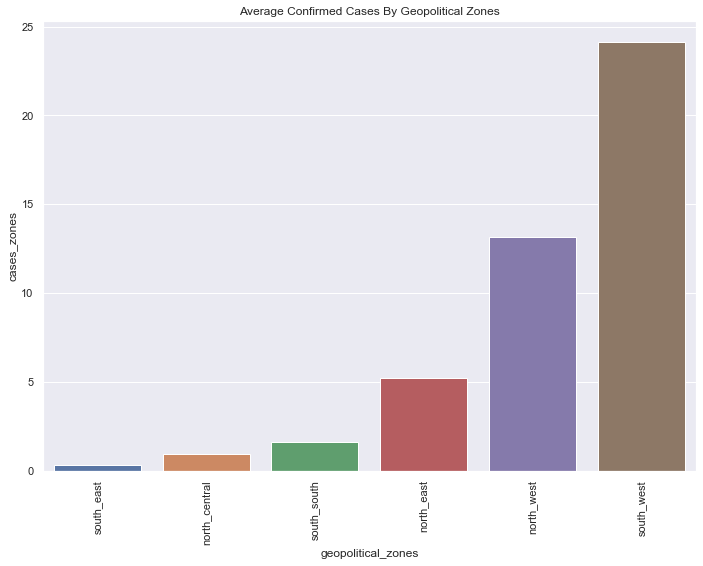

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='geopolitical_zones', y='cases_zones', data=average_zones_cases, order=['south_east','north_central','south_south','north_east','north_west','south_west']);
ax.set_title('Average Confirmed Cases By Geopolitical Zones')
plt.xticks(rotation=90)
plt.show()

### Monthly  Case Fatality Rate And Mortality Rate

In [34]:
month_fatality = exp_wip_col_clean[['dates', 'death', 'total_daily_cases', 'discharged_recovered']]

In [35]:
#set dates as index
month_fatality_index = month_fatality.set_index('dates')
month_fatality_index.head()

,death,total_daily_cases,discharged_recovered
dates,,,
2020-02-27 15:40:38,0,1,0
2020-02-28 01:00:36,0,0,0
2020-02-29 02:26:52,0,0,0
2020-03-01 22:44:08,0,0,0
2020-03-02 11:53:02,0,0,0


In [36]:
#group cases into months
month_fatality_index_group = month_fatality_index.resample('M').agg({'death': 'sum', 'total_daily_cases':'sum','discharged_recovered':'sum'}).reset_index()
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered
0,2020-02-29,0,1,0
1,2020-03-31,2,137,9
2,2020-04-30,56,1796,310
3,2020-05-31,59,1983,360


In [37]:
#case fatality and mortality calculation
month_fatality_index_group['case_fatality'] = month_fatality_index_group['death'] / month_fatality_index_group['total_daily_cases']
month_fatality_index_group['mortality_rate'] = month_fatality_index_group['death']/1000
month_fatality_index_group['month'] = month_fatality_index_group['dates'].dt.month

In [38]:
month_fatality_index_group.head()

,dates,death,total_daily_cases,discharged_recovered,case_fatality,mortality_rate,month
0,2020-02-29,0,1,0,0.000000,0.000,2
1,2020-03-31,2,137,9,0.014599,0.002,3
2,2020-04-30,56,1796,310,0.031180,0.056,4
3,2020-05-31,59,1983,360,0.029753,0.059,5


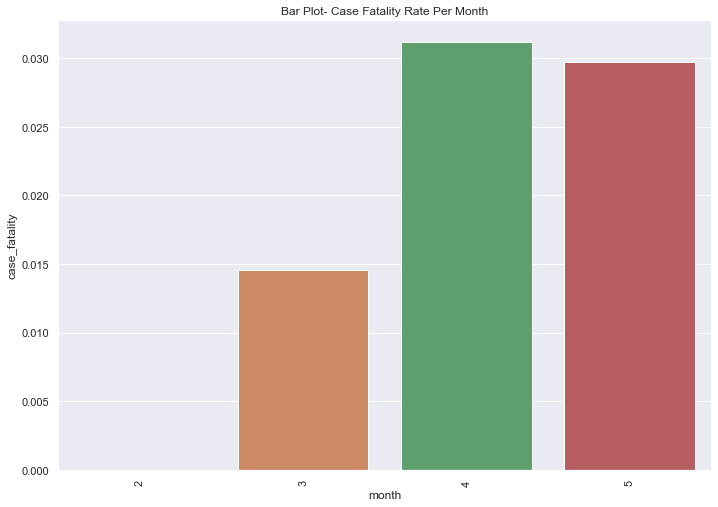

In [72]:
#visualize monthly fatality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='case_fatality', data=month_fatality_index_group)
ax.set_title('Bar Plot- Case Fatality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


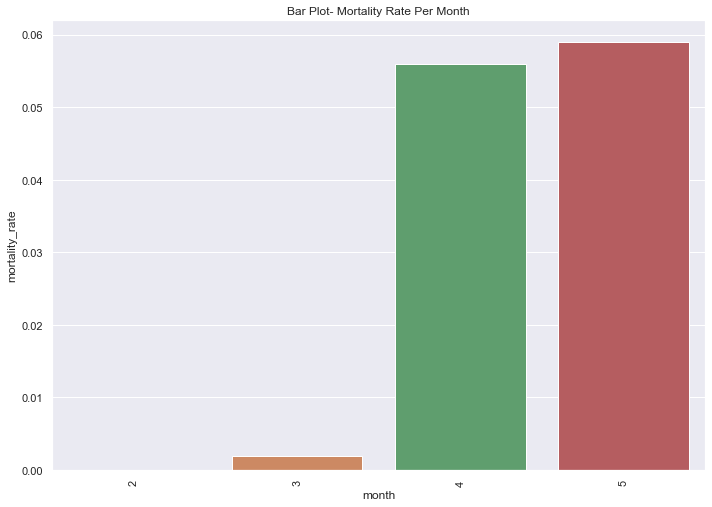

In [71]:
#visualize Mortality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='mortality_rate', data=month_fatality_index_group)
ax.set_title('Bar Plot- Mortality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


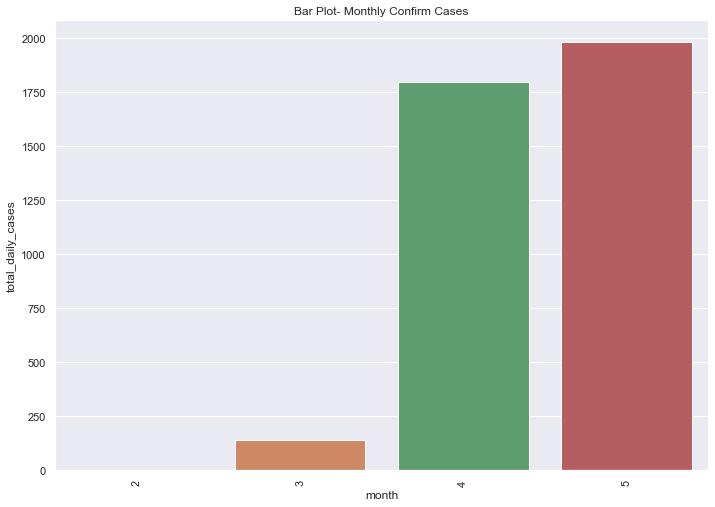

In [70]:
# Monthly confirmed cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='total_daily_cases', data=month_fatality_index_group)
ax.set_title('Bar Plot- Monthly Confirm Cases')
plt.xticks(rotation = 90)
plt.show()

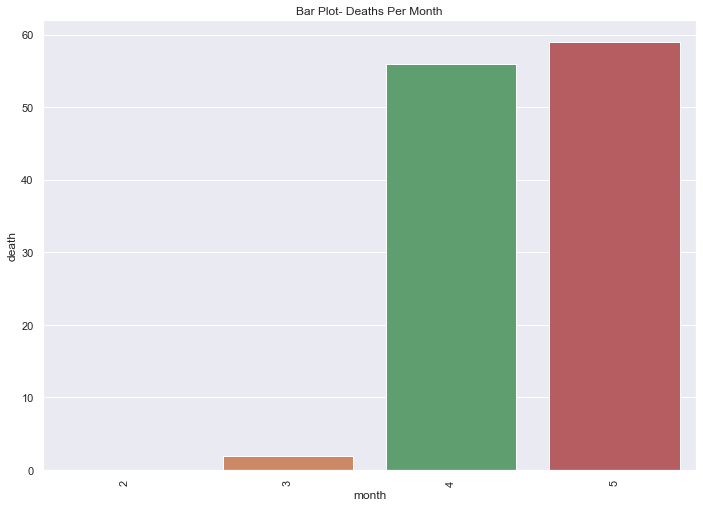

In [69]:
#Monthly Deaths
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='death', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

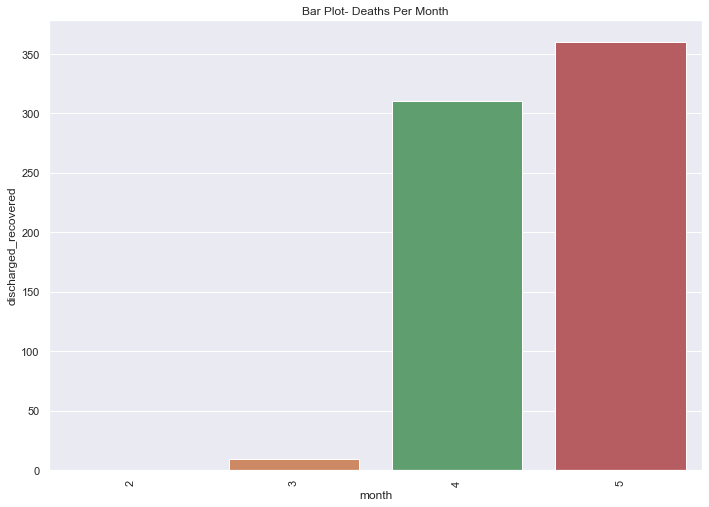

In [68]:
#Number of Recoveries by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='discharged_recovered', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

### Death By States

In [44]:
deathby_state.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"1,667","1,186",448,33
1,Kano,547,509,20,18
2,FCT,336,292,40,4
3,Borno,142,128,0,14
4,Katsina,137,120,9,8


In [49]:
state_stats = deathby_state.groupby('States Affected').agg({'No. Discharged':'max', 'No. of Deaths':'max'}).reset_index()
state_stats.head()

,States Affected,No. Discharged,No. of Deaths
0,Abia,1,0
1,Adamawa,0,0
2,Akwa Ibom,10,2
3,Anambra,1,0
4,Bauchi,6,1


In [57]:
state_stats['States Affected'].values

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu',
       'FCT', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina',
       'Kebbi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo',
       'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe',
       'Zamfara'], dtype=object)

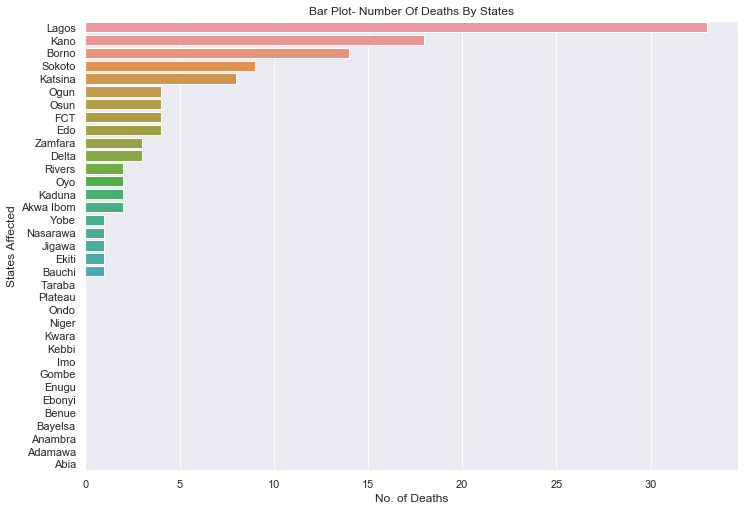

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Deaths', y='States Affected', data=state_stats, 
                 order=['Lagos','Kano','Borno','Sokoto','Katsina','Ogun','Osun','FCT','Edo','Zamfara','Delta','Rivers','Oyo','Kaduna','Akwa Ibom','Yobe','Nasarawa','Jigawa','Ekiti','Bauchi','Taraba','Plateau','Ondo','Niger','Kwara','Kebbi','Imo','Gombe','Enugu','Ebonyi','Benue','Bayelsa','Anambra','Adamawa','Abia'])
ax.set_title('Bar Plot- Number Of Deaths By States')
plt.yticks(rotation=360)
plt.show()

### Recoveries By States

In [ ]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# ax = sns.barplot(x='States Affected',y='No. of Deaths', data=state_stats, 
#                  order=['Abia','Adamawa','Anambra','Bayelsa','Benue','Ebonyi','Enugu','Gombe','Imo','Kebbi','Kwara','Niger','Ondo','Plateau','Taraba','Bauchi','Ekiti','Jigawa','Nasarawa','Yobe','Akwa Ibom','Kaduna','Oyo','Rivers','Delta','Zamfara','Edo','FCT','Osun','Ogun','Katsina','Sokoto','Borno','Kano','Lagos'])
# ax.set_title('Bar Plot- Number Of Deaths By States')
# plt.xticks(rotation=90)
# plt.show()